# Data Science Capstone 3

## Image Classifier Real vs Fake

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tr_accuracy_128 = [0.8542, 0.8882, 0.8971, 0.9004, 0.9049, 0.9105, 0.9116, 0.9138, 0.9181, 0.9218]
tr_time_128 = [519, 334, 329, 400, 324, 413, 360, 333, 324, 326]
te_accuracy_128 = 0.9044

In [3]:
tr_accuracy_224 = [0.8005, 0.8849, 0.9059, 0.9294, 0.9481, 0.9584, 0.9656, 0.9555, 0.9591, 0.9703]
tr_time_224 = [191, 177, 178, 178, 176, 177, 176, 173, 172, 172]
te_accuracy_224 = 0.8729

In [4]:
tr_accuracy_rn50 = [0.8042, 0.8838, 0.9126, 0.9332, 0.9365, 0.9473, 0.9549, 0.9613, 0.9643, 0.9586]
tr_time_rn50 = [527, 507, 516, 517, 520, 519, 517, 525, 529, 530]
te_accuracy_rn50 = 0.9205

In [5]:
tr_accuracy_en_b0 = [0.8063, 0.8563, 0.8778, 0.8892, 0.8992, 0.9111, 0.9209, 0.9216, 0.9278, 0.9343]
tr_time_en_b0 = [234, 199, 203, 205, 204, 202, 201, 200, 202, 202]
te_accuracy_en_b0 = 0.9094

In [6]:
tr_accuracy_cnb = [0.8717, 0.9173, 0.9252, 0.9356, 0.9388, 0.9443, 0.9520, 0.9567, 0.9586, 0.9618]
tr_time_cnb = [5309, 4862, 5848, 4748, 4784, 4848, 4855, 4872, 4635, 2802]
te_accuracy_cnb = 0.9404

### Data Visualizations

In [7]:
# Plot 1: Training Accuracies across epochs

In [11]:
epochs = np.linspace(1, 10, num=10, dtype=int)
epochs

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [12]:
df_1 = pd.DataFrame({"epochs": epochs,
                    "CNN 128": tr_accuracy_128,
                  "CNN 224": tr_accuracy_224,
                  "ResNet-50": tr_accuracy_rn50,
                  "EfficientNetV2-B0": tr_accuracy_en_b0,
                  "ConvNeXtBase": tr_accuracy_cnb})
df_1

,epochs,CNN 128,CNN 224,ResNet-50,EfficientNetV2-B0,ConvNeXtBase
0,1,0.8542,0.8005,0.8042,0.8063,0.8717
1,2,0.8882,0.8849,0.8838,0.8563,0.9173
2,3,0.8971,0.9059,0.9126,0.8778,0.9252
3,4,0.9004,0.9294,0.9332,0.8892,0.9356
4,5,0.9049,0.9481,0.9365,0.8992,0.9388
5,6,0.9105,0.9584,0.9473,0.9111,0.9443
6,7,0.9116,0.9656,0.9549,0.9209,0.9520
7,8,0.9138,0.9555,0.9613,0.9216,0.9567
8,9,0.9181,0.9591,0.9643,0.9278,0.9586
9,10,0.9218,0.9703,0.9586,0.9343,0.9618


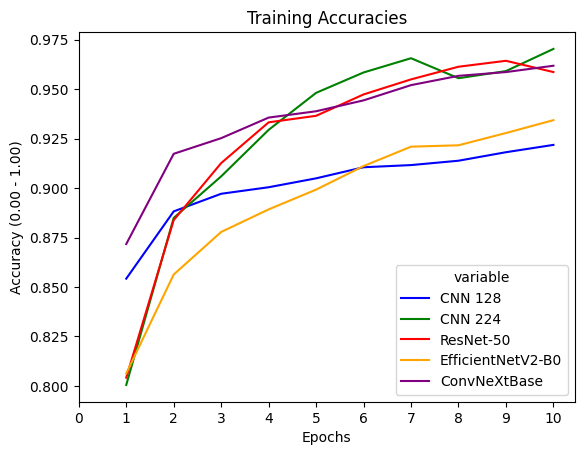

In [15]:
sns.lineplot(x='epochs', y='value', hue='variable',
             data=pd.melt(df_1, ["epochs"]),
            palette=['blue', 'green', 'red', 'orange', 'purple'])

plt.xticks(ticks=np.arange(0, 11, 1))
plt.title("Training Accuracies")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (0.00 - 1.00)")
plt.show()

In [8]:
# Plot 2: Average Training vs Testing Accuracies

In [21]:
model_names = ["CNN 128", "CNN 128", "CNN 224", "CNN 224", "ResNet-50", "ResNet-50",
               "EfficientNetV2", "EfficientNetV2", "ConvNeXtBase", "ConvNeXtBase"]

In [17]:
dataset_type = ["Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test", "Train", "Test"]

In [22]:
df_2 = pd.DataFrame({"Models": model_names,
                     "Dataset": dataset_type,
                     "Accuracy": [np.mean(tr_accuracy_128), te_accuracy_128, np.mean(tr_accuracy_224), te_accuracy_224, np.mean(tr_accuracy_rn50),
                                   te_accuracy_rn50, np.mean(tr_accuracy_en_b0), te_accuracy_en_b0, np.mean(tr_accuracy_cnb), te_accuracy_cnb]})
df_2

,Models,Dataset,Accuracy
0,CNN 128,Train,0.90206
1,CNN 128,Test,0.90440
2,CNN 224,Train,0.92777
3,CNN 224,Test,0.87290
4,ResNet-50,Train,0.92567
5,ResNet-50,Test,0.92050
6,EfficientNetV2,Train,0.89445
7,EfficientNetV2,Test,0.90940
8,ConvNeXtBase,Train,0.93620
9,ConvNeXtBase,Test,0.94040


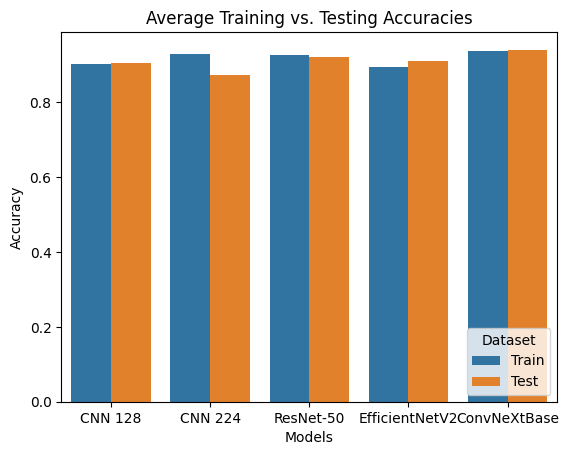

In [23]:
f = sns.barplot(x="Models",
            y="Accuracy",
            hue="Dataset",
            data=df_2)

plt.title("Average Training vs. Testing Accuracies")
sns.move_legend(f, "lower right")
plt.show()

In [9]:
# Plot 3: Training Time across epochs

In [24]:
df_3 = pd.DataFrame({"epochs": epochs,
                    "CNN 128": tr_time_128,
                  "CNN 224": tr_time_224,
                  "ResNet-50": tr_time_rn50,
                  "EfficientNetV2-B0": tr_time_en_b0,
                  "ConvNeXtBase": tr_time_cnb})
df_3

,epochs,CNN 128,CNN 224,ResNet-50,EfficientNetV2-B0,ConvNeXtBase
0,1,519,191,527,234,5309
1,2,334,177,507,199,4862
2,3,329,178,516,203,5848
3,4,400,178,517,205,4748
4,5,324,176,520,204,4784
5,6,413,177,519,202,4848
6,7,360,176,517,201,4855
7,8,333,173,525,200,4872
8,9,324,172,529,202,4635
9,10,326,172,530,202,2802


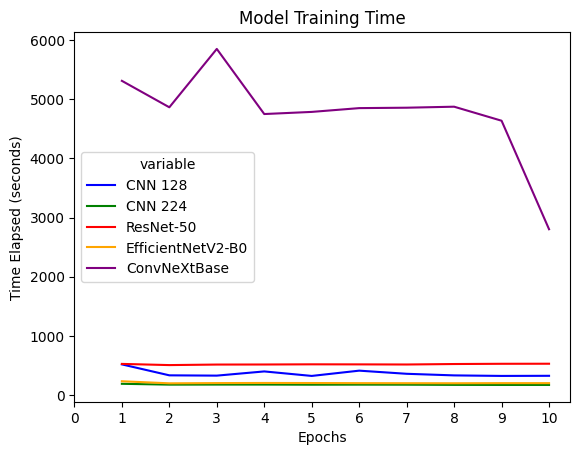

In [25]:
g1 = sns.lineplot(x='epochs', y='value', hue='variable',
             data=pd.melt(df_3, ["epochs"]),
            palette=['blue', 'green', 'red', 'orange', 'purple'])

plt.xticks(ticks=np.arange(0, 11, 1))
plt.title("Model Training Time")
plt.xlabel("Epochs")
plt.ylabel("Time Elapsed (seconds)")
plt.show()

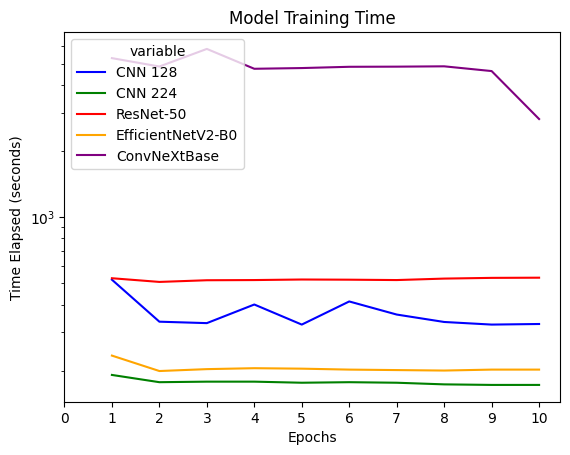

In [26]:
g2 = sns.lineplot(x='epochs', y='value', hue='variable',
             data=pd.melt(df_3, ["epochs"]),
            palette=['blue', 'green', 'red', 'orange', 'purple'])

plt.xticks(ticks=np.arange(0, 11, 1))
g2.set(yscale='log')
plt.title("Model Training Time")
plt.xlabel("Epochs")
plt.ylabel("Time Elapsed (seconds)")
plt.show()

In [10]:
# Plot 4: Cumulative Training Time across epochs

In [27]:
cum_tr_time_128 = []
cum_tr_time_224 = []
cum_tr_time_rn50 = []
cum_tr_time_en_b0 = []
cum_tr_time_cnb = []
rs_128 = 0
rs_224 = 0
rs_rn50 = 0
rs_en_b0 = 0
rs_cnb = 0
for i in range(10):
    rs_128 += tr_time_128[i]
    rs_224 += tr_time_224[i]
    rs_rn50 += tr_time_rn50[i]
    rs_en_b0 += tr_time_en_b0[i]
    rs_cnb += tr_time_cnb[i]
    cum_tr_time_128.append(rs_128)
    cum_tr_time_224.append(rs_224)
    cum_tr_time_rn50.append(rs_rn50)
    cum_tr_time_en_b0.append(rs_en_b0)
    cum_tr_time_cnb.append(rs_cnb)

In [28]:
df_4 = pd.DataFrame({"epochs": epochs,
                    "CNN 128": cum_tr_time_128,
                  "CNN 224": cum_tr_time_224,
                  "ResNet-50": cum_tr_time_rn50,
                  "EfficientNetV2-B0": cum_tr_time_en_b0,
                  "ConvNeXtBase": cum_tr_time_cnb})
df_4

,epochs,CNN 128,CNN 224,ResNet-50,EfficientNetV2-B0,ConvNeXtBase
0,1,519,191,527,234,5309
1,2,853,368,1034,433,10171
2,3,1182,546,1550,636,16019
3,4,1582,724,2067,841,20767
4,5,1906,900,2587,1045,25551
5,6,2319,1077,3106,1247,30399
6,7,2679,1253,3623,1448,35254
7,8,3012,1426,4148,1648,40126
8,9,3336,1598,4677,1850,44761
9,10,3662,1770,5207,2052,47563


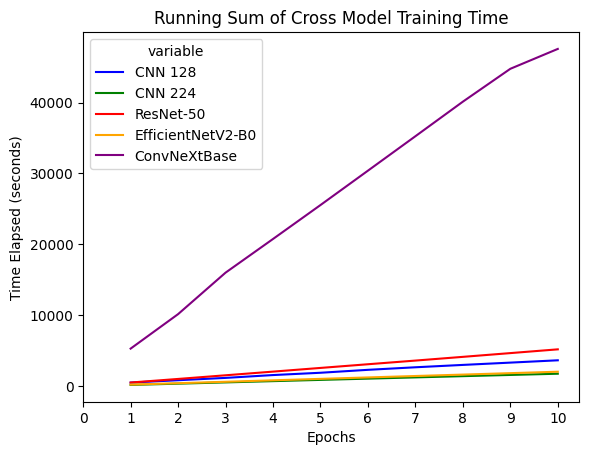

In [29]:
g3 = sns.lineplot(x='epochs', y='value', hue='variable',
             data=pd.melt(df_4, ["epochs"]),
            palette=['blue', 'green', 'red', 'orange', 'purple'])

plt.xticks(ticks=np.arange(0, 11, 1))
plt.title("Running Sum of Cross Model Training Time")
plt.xlabel("Epochs")
plt.ylabel("Time Elapsed (seconds)")
plt.show()

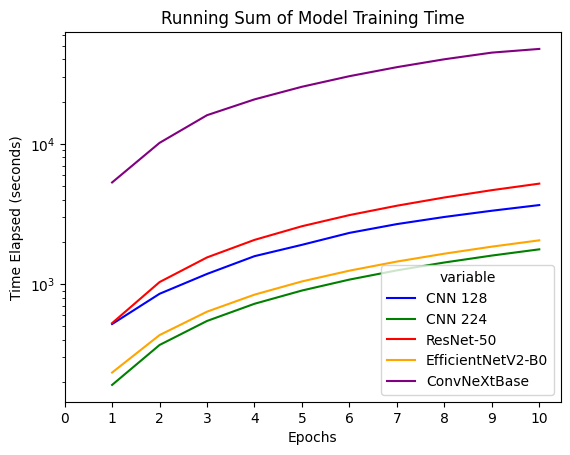

In [30]:
g4 = sns.lineplot(x='epochs', y='value', hue='variable',
             data=pd.melt(df_4, ["epochs"]),
            palette=['blue', 'green', 'red', 'orange', 'purple'])

plt.xticks(ticks=np.arange(0, 11, 1))
g4.set(yscale='log')
plt.title("Running Sum of Model Training Time")
plt.xlabel("Epochs")
plt.ylabel("Time Elapsed (seconds)")
plt.show()